# Adventureworks försäljningsanalys

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

user = "SA"
password = quote_plus("Lejonkatt123!")
server = 'localhost:1434'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Anslutning till SQL Server lyckades")
except Exception as e:
    print("Kunde inte ansluta", e)

Anslutning till SQL Server lyckades


C:\Users\shara\AppData\Local\Temp\ipykernel_10884\2655009714.py:22: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


In [2]:
def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

## Analys 1 - Antal produkter per kategori
**Affärsfråga: Hur många produkter finns i varje kategori?**

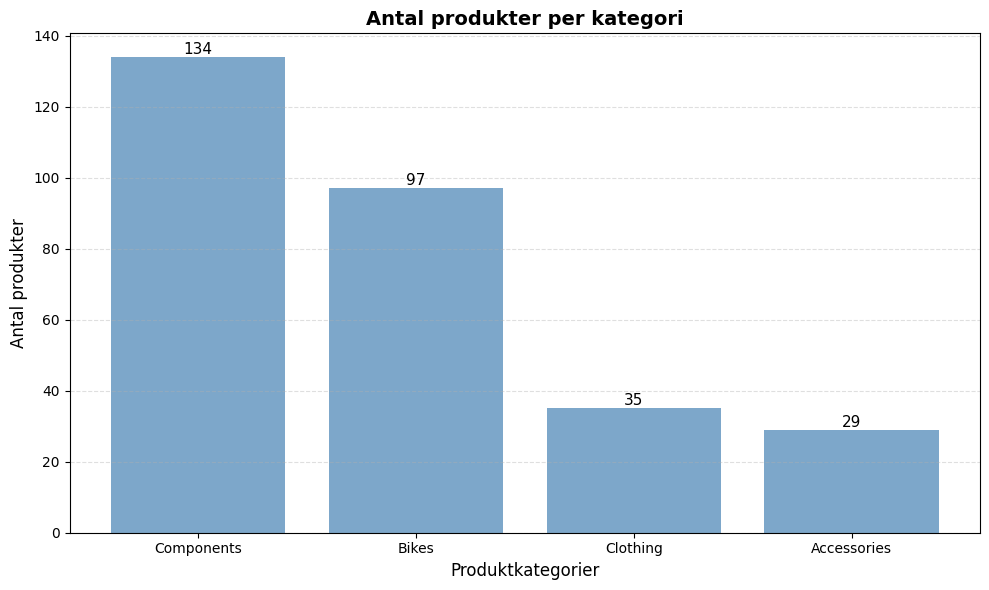

In [25]:
query_vis1 = """
SELECT
    pc.Name AS CategoryName,
    COUNT(DISTINCT p.ProductID) AS ProductCount
FROM Production.ProductCategory pc 
INNER JOIN Production.ProductSubcategory psc ON pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product p ON psc.ProductSubcategoryID = p.ProductSubcategoryID
GROUP BY pc.Name
ORDER BY ProductCount DESC
"""

df_vis1 = query_df(query_vis1)

fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(df_vis1['CategoryName'], df_vis1['ProductCount'], color='steelblue', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha = 'center',
        va = 'bottom',
        fontsize=11
    ) 

ax.set_title('Antal produkter per kategori', fontsize=14, fontweight='bold')
ax.set_xlabel('Produktkategorier',fontsize=12)
ax.set_ylabel('Antal produkter', fontsize=12 )
ax.grid(axis='y',linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Insikter - Antal produkter per kategori

## Analys 2 - Försäljning per produktkategori
**Affärsfråga: Vilka produktkategorier genererar mest intäkter?**

In [ ]:
# Kod

### Insikter - Försäljning per produktkategori

## Analys 3 - Försäljningstrend över tid
**Affärsfråga: Hur har försäljningen utvecklats över tid?**

In [ ]:
# Kod

### Insikter - Försäljningstrend över tid

## Analys 4 - Försäljning och antal ordrar per år
**Affärsfråga: Hur ser total försäljning och antal ordrar ut per år?**

In [ ]:
# Kod

### Insikter - Försäljning och antal ordrar per år

## Analys 5 -  Top 10 produkter
**Affärsfråga:  Vilka 10 produkter genererar mest försäljning?**

In [ ]:
# Kod

### Insikter - Top 10 produkter

## Analys 6 - Försäljning och antal kunder per region
**Affärsfråga: Hur skiljer sig försäljningen mellan olika regioner, och hur många unika kunder har varje region?**

In [ ]:
# Kod

### Insikter - Försäljning och antal kunder per region

## Analys 7 - Genomsnittligt ordervärde per region och kundtyp
**Affärsfråga: Vilka regioner har högst/lägst genomsnittligt ordervärde, och skiljer det sig mellan individuella kunder och företagskunder?**

In [ ]:
# Kod

### Insikter - Genomsnittligt ordervärde per region och kundtyp